<a href="https://colab.research.google.com/github/sidh0304/CODSOFT/blob/main/UserAuthRiskPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/cybersecurity_intrusion_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [ ]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
df.tail()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0
9536,SID_09537,340,TCP,6,86.876744,NaN,0.277069,4,Chrome,1,1


# **Data Cleaning**

**1. Handle Missing Values**

In [ ]:
df.isnull().sum() #identify missing values

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [ ]:
df.dropna(inplace=True)  # Remove rows with missing values

In [ ]:
df.isnull().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,0
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


**2. Drop the session_id column (not useful for prediction)**

In [ ]:
df = df.drop(columns=['session_id'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7571 entries, 0 to 9535
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  7571 non-null   int64  
 1   protocol_type        7571 non-null   object 
 2   login_attempts       7571 non-null   int64  
 3   session_duration     7571 non-null   float64
 4   encryption_used      7571 non-null   object 
 5   ip_reputation_score  7571 non-null   float64
 6   failed_logins        7571 non-null   int64  
 7   browser_type         7571 non-null   object 
 8   unusual_time_access  7571 non-null   int64  
 9   attack_detected      7571 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 650.6+ KB


**3. Ensure "ip_reputation_score" is numeric, replacing errors with NaN**

In [ ]:
df["ip_reputation_score"] = pd.to_numeric(df["ip_reputation_score"], errors="coerce")

**4. Fill NaN values in 'ip_reputation_score' with the median**

In [ ]:
df["ip_reputation_score"].fillna(df["ip_reputation_score"].median(), inplace=True)

<ipython-input-28-69ebbdaae67f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ip_reputation_score"].fillna(df["ip_reputation_score"].median(), inplace=True)


**5. Drop Duplicate Values**

In [ ]:
df = df.drop_duplicates()

**6. Check final data info**

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7571 entries, 0 to 9535
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  7571 non-null   int64  
 1   protocol_type        7571 non-null   object 
 2   login_attempts       7571 non-null   int64  
 3   session_duration     7571 non-null   float64
 4   encryption_used      7571 non-null   object 
 5   ip_reputation_score  7571 non-null   float64
 6   failed_logins        7571 non-null   int64  
 7   browser_type         7571 non-null   object 
 8   unusual_time_access  7571 non-null   int64  
 9   attack_detected      7571 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 650.6+ KB


,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


# **Exploratory Data Analysis (EDA)**

**1. Attack Detection Count**

<ipython-input-31-e650884fd7ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="attack_detected", data=df, palette="viridis")


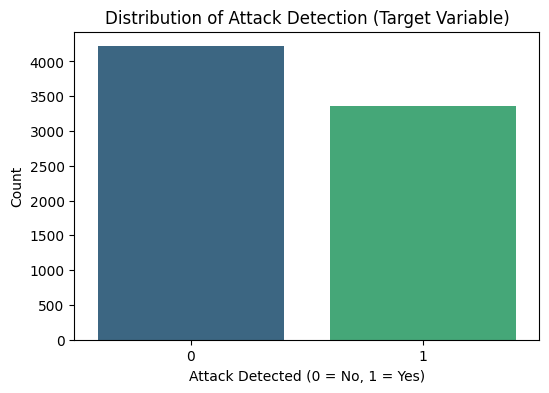

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="attack_detected", data=df, palette="viridis")
plt.title("Distribution of Attack Detection (Target Variable)")
plt.xlabel("Attack Detected (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

**2. IP Reputation Score Distribution**

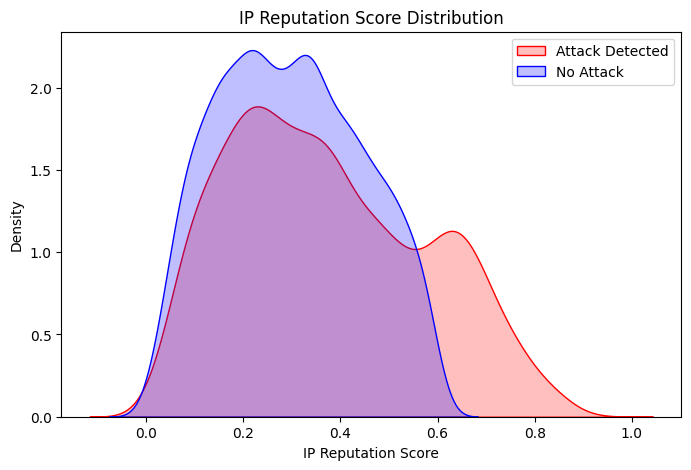

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["attack_detected"] == 1]["ip_reputation_score"], label="Attack Detected", fill=True, color="red")
sns.kdeplot(df[df["attack_detected"] == 0]["ip_reputation_score"], label="No Attack", fill=True, color="blue")
plt.title("IP Reputation Score Distribution")
plt.xlabel("IP Reputation Score")
plt.ylabel("Density")
plt.legend()
plt.show()

**3. Failed Logins vs. Attack Detection**

<ipython-input-33-4ae8c75230fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="attack_detected", y="failed_logins", data=df, palette="coolwarm")


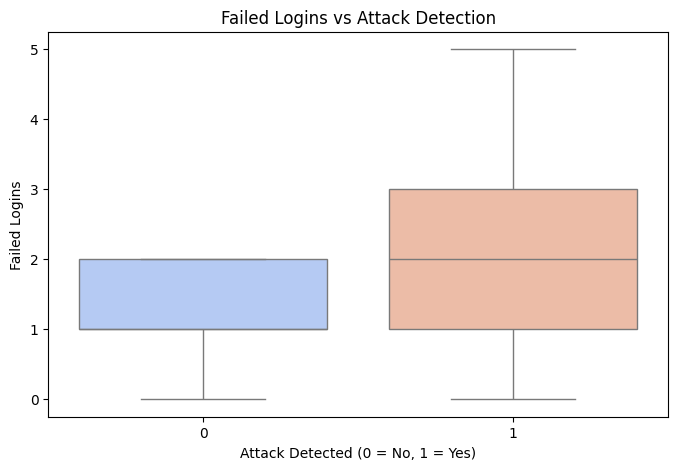

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="attack_detected", y="failed_logins", data=df, palette="coolwarm")
plt.title("Failed Logins vs Attack Detection")
plt.xlabel("Attack Detected (0 = No, 1 = Yes)")
plt.ylabel("Failed Logins")
plt.show()

# **Data Preprocessing**

**1. Label Encoding**

In [ ]:
encoder = LabelEncoder()
df["protocol_type"] = encoder.fit_transform(df["protocol_type"])
df["encryption_used"] = encoder.fit_transform(df["encryption_used"])
df["browser_type"] = encoder.fit_transform(df["browser_type"])

**2. Separate features and target variable**

In [ ]:
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

In [ ]:
X

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access
0,599,1,4,492.983263,1,0.606818,1,1,0
1,472,1,3,1557.996461,1,0.301569,0,2,0
2,629,1,3,75.044262,1,0.739164,2,0,0
3,804,2,4,601.248835,1,0.123267,0,4,0
4,453,1,5,532.540888,0,0.054874,1,2,0
...,...,...,...,...,...,...,...,...,...
9528,535,1,7,50.518476,1,0.767659,1,1,1
9531,746,1,7,315.151758,1,0.190059,3,0,0
9532,194,0,3,226.049889,0,0.517737,3,0,0
9534,664,1,5,35.170248,0,0.359200,1,2,0


In [ ]:
y

,attack_detected
0,1
1,0
2,1
3,1
4,0
...,...
9528,1
9531,1
9532,1
9534,0


**3. Split dataset into training (80%) and testing (20%)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Train Model**

**1. Train Random Forest Model**

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**2. Predict on test data**

In [ ]:
y_pred = model.predict(X_test)

**3. Evaluate Model Performance**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.90


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       841
           1       0.99      0.78      0.88       674

    accuracy                           0.90      1515
   macro avg       0.92      0.89      0.90      1515
weighted avg       0.92      0.90      0.90      1515



**4. Confusion Matrix**

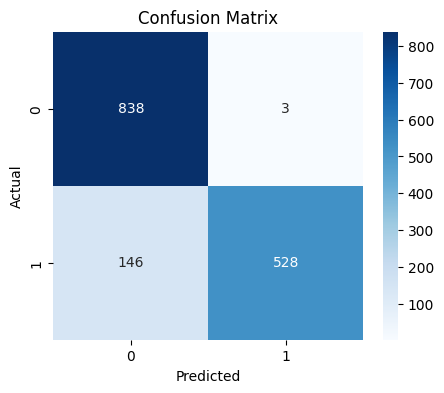

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Feature Importance Analysis**

<ipython-input-45-0dec935967d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


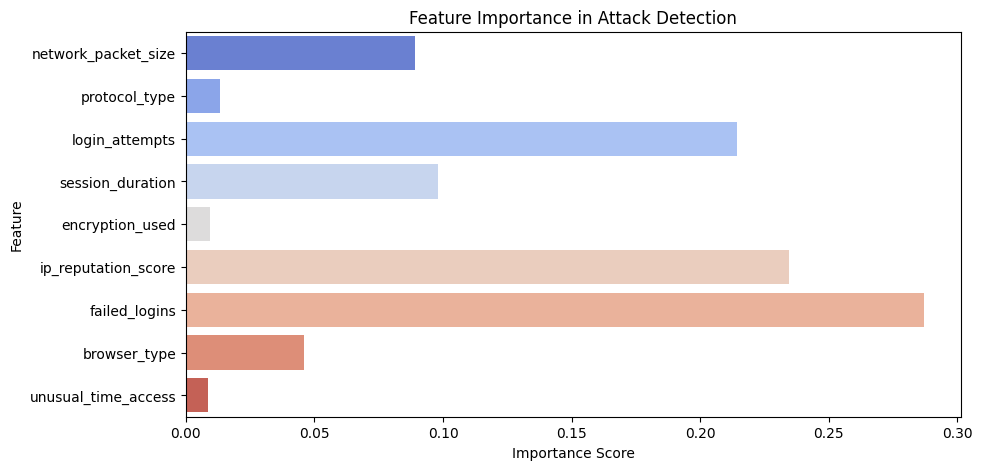

In [ ]:
# Get feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette="coolwarm")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Attack Detection")
plt.show()

# **Making Predictions on New Data**

In [ ]:
new_data = np.array([[500, 1, 3, 2, 300.5, 75.3, 1, 2, 0]])
new_data_scaled = scaler.transform(new_data)

# Predict attack risk
prediction = model.predict(new_data_scaled)
print("Attack Detected" if prediction[0] == 1 else "No Attack Detected")

Attack Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
